In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import all files to notebook

In [2]:
train = pd.read_csv('../ML-projects/data/train.csv',index_col = 'Id')
test = pd.read_csv('../ML-projects/data/test.csv',index_col = 'Id')
ans = pd.read_csv('../ML-projects/data/sample_submission.csv',index_col = 'Id')

In [3]:
test = pd.merge(test,ans,on= 'Id')

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

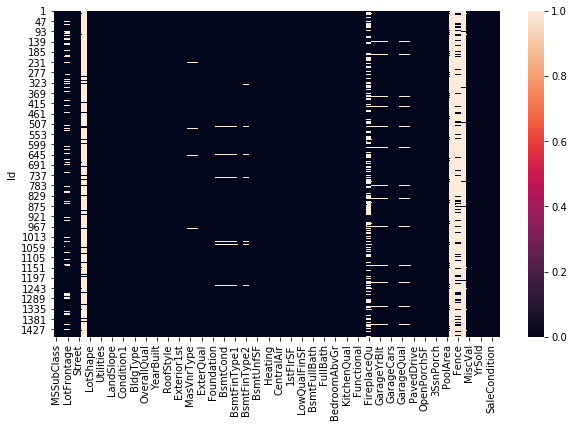

In [46]:
plt.figure(figsize = (10,6))
sns.heatmap(train.isnull())

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 80 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 

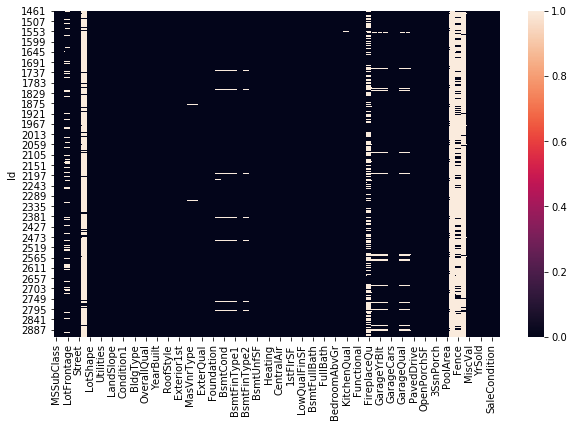

In [47]:
plt.figure(figsize = (10,6))
sns.heatmap(test.isnull())

In [48]:
delete_col = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [9]:
train_delete_col = train.drop(delete_col,axis=1,)
test_delete_col = test.drop(delete_col,axis=1)

In [10]:
train_clean = train_delete_col.dropna()
test_clean = test_delete_col.dropna()

In [11]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1 to 1460
Data columns (total 70 columns):
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non-null object
MasVnrType       1094 no

In [12]:
object_col = train_clean.select_dtypes(include='object').columns

In [17]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
encoder_data = []
def encoder(data):
    data_col = data.columns
    data_index = data.index
    row = data.shape[0]
    columns = data.shape[1]
    le = LabelEncoder()
    for i in data.columns:
        encoder_data.append(le.fit_transform(data[i]))
    return pd.DataFrame(np.reshape(np.array(encoder_data),(row,columns)),columns=data_col,index=data_index) 

In [14]:
train_obj_encoder = encoder(train_clean[object_col])
#test_obj_encoder = encoder(test_clean[object_col])

In [15]:
train_completely_clean = pd.merge(train_clean.drop(columns = object_col),train_obj_encoder,how='inner',on = 'Id')

In [18]:
test_obj_encoder = encoder(test_clean[object_col])
test_completely_clean = pd.merge(test_clean.drop(columns = object_col),test_obj_encoder,how='inner',on = 'Id')

In [19]:
data_corr = train_completely_clean.corr()
key = data_corr['SalePrice'][data_corr.SalePrice>0.3].keys()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train = train_completely_clean[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y_train = train_completely_clean['SalePrice']

X_test = test_completely_clean[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
y_test = test_completely_clean['SalePrice']

In [21]:
data_corr['SalePrice'][data_corr.SalePrice>0.3]

LotFrontage     0.343978
LotArea         0.302268
OverallQual     0.795437
YearBuilt       0.523434
YearRemodAdd    0.519806
MasVnrArea      0.485409
BsmtFinSF1      0.378678
TotalBsmtSF     0.617741
1stFlrSF        0.617692
2ndFlrSF        0.302569
GrLivArea       0.707481
FullBath        0.578299
TotRmsAbvGrd    0.560521
Fireplaces      0.458182
GarageYrBlt     0.502248
GarageCars      0.652103
GarageArea      0.620772
WoodDeckSF      0.330286
OpenPorchSF     0.338600
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = lm.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score
case1_mse = mean_squared_error(y_test,y_pred)
case1_mae = mean_absolute_error(y_test,y_pred)
case1_r2  = r2_score(y_test,y_pred)
print(case1_mse)
print(case1_mae)
print(case1_r2)

5013246246.398537
56074.035045988545
-20.457134947098055


# Linear regression with all variable

In [25]:
X_train_allvar = train_completely_clean.drop(columns='SalePrice')
y_train_allvar = train_completely_clean['SalePrice']

X_test_allvar = test_completely_clean.drop(columns='SalePrice')
y_test_allvar = test_completely_clean['SalePrice']

In [26]:
from sklearn.preprocessing import StandardScaler,Normalizer
scale = StandardScaler()
X_train_allvar = scale.fit_transform(X_train_allvar)
X_test_allvar  = scale.fit_transform(X_test_allvar)

In [27]:
lm_allvar = LinearRegression()
lm_allvar.fit(X_train_allvar,y_train_allvar)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred_allvar = lm_allvar.predict(X_test_allvar)

In [29]:
case2_mse = mean_squared_error(y_test_allvar,y_pred_allvar)
case2_mae = mean_absolute_error(y_test_allvar,y_pred_allvar)
case2_r2 = r2_score(y_pred_allvar,y_test_allvar)
print(case2_mse)
print(case2_mae)
print(case2_r2)

2.956812851477633e+31
4197854818657457.5
2.098765605751396e-12


### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train_allvar,y_train_allvar)
ytree_pred = tree.predict(X_test_allvar)
tree_mse = mean_squared_error(ytree_pred,y_test_allvar)
tree_mae = mean_absolute_error(ytree_pred,y_test_allvar)
tree_r2 = r2_score(ytree_pred,y_test_allvar)
print(tree_mse)
print(tree_mae)
print(tree_r2)

7093892323.3961315
59489.157198621004
0.06056119711857266
